<a href="https://colab.research.google.com/github/jcacierto/BMEN415Project/blob/main/RegressionCodeMorgan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#import libraries
import pandas as pd
import seaborn as sns

from sklearn import *
from sklearn.metrics import mean_squared_error as mse
from math import sqrt

from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import linear_model

In [5]:
#import data and select features 
data = pd.read_csv('/content/Volumetric_features.csv')
df = data[['Left-Lateral-Ventricle',	'Left-Inf-Lat-Vent',	 
           'Left-Cerebellum-White-Matter',	'Left-Cerebellum-Cortex',	
           'Left-Thalamus',	'Left-Caudate',	'Left-Putamen',	'Left-Pallidum',	
           '3rd-Ventricle',	'4th-Ventricle',	'Brain-Stem',	'Left-Hippocampus',	
           'Left-Amygdala',	'CSF',	'Left-Accumbens-area',	'Left-VentralDC',	
           'Left-vessel',	'Left-choroid-plexus',	'Right-Lateral-Ventricle',	
           'Right-Inf-Lat-Vent']] #	'Right-Cerebellum-White-Matter',	
           #'Right-Cerebellum-Cortex']]

In [6]:
# split train and test data
from sklearn.model_selection import train_test_split

X = df.copy()
y = data["Age"]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, 
                                                    random_state=42)
print(X_train.shape)
print(X_test.shape)

(3380, 20)
(846, 20)


In [13]:
# K Neighbours Regressor
KNR_model = KNeighborsRegressor()
KNR_model.fit(X_train,y_train)

y_pred_test = KNR_model.predict(X_test)
y_train_pred = KNR_model.predict(X_train)

KNR_trainmse = sqrt(mse(y_train, y_train_pred))
KNR_validmse = sqrt(mse(y_test, y_pred_test))
print("training mean square error: {}\nvalidation mean square error:{}".format
      (KNR_trainmse, KNR_validmse))

training mean square error: 8.213909403707085
validation mean square error:10.294876965062201


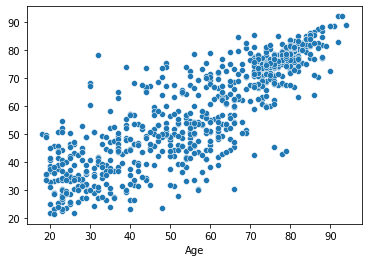

In [15]:
sns.scatterplot(x=y_test, y=y_pred_test)

In [16]:
# Gradient Boosting Regressor
GBR_model = GradientBoostingRegressor()
GBR_model.fit(X_train,y_train)

y_pred_test = GBR_model.predict(X_test)
y_train_pred = GBR_model.predict(X_train)

GBR_trainmse = sqrt(mse(y_train, y_train_pred))
GBR_validmse = sqrt(mse(y_test, y_pred_test))
print("training mean square error: {}\nvalidation mean square error: {}".format
      (GBR_trainmse, GBR_validmse))

training mean square error: 7.265982558129394
validation mean square error: 8.392259241442474


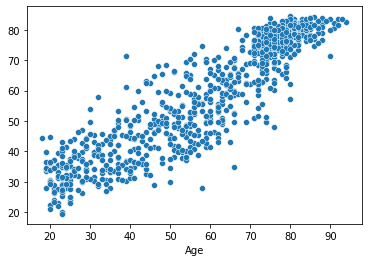

In [17]:
sns.scatterplot(x=y_test, y=y_pred_test)

In [18]:
# Bayes Ridge Regression
BRR_model = linear_model.BayesianRidge()
BRR_model.fit(X_train,y_train)

y_pred_test = BRR_model.predict(X_test)
y_train_pred = BRR_model.predict(X_train)

BRR_trainmse = sqrt(mse(y_train, y_train_pred))
BRR_validmse = sqrt(mse(y_test, y_pred_test))
print("training mean square error: {}\nvalidation mean square error: {}".format
      (BRR_trainmse, BRR_validmse))

training mean square error: 9.437506530672442
validation mean square error: 9.383404292401508


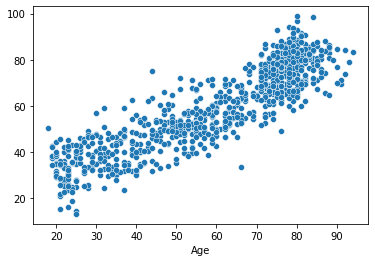

In [19]:
sns.scatterplot(x=y_test, y=y_pred_test)